In [8]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

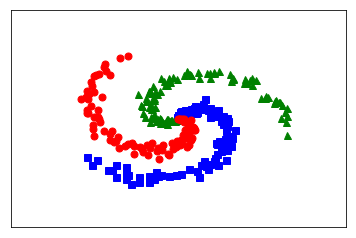

[ 7.84731399  8.32402985  8.39554669  8.47169278  8.1497107   7.87065622
  8.30283207  8.59166675  8.38492049  8.41774574  8.44922059  8.0991545
  8.06156894  8.57125086  8.59255985  8.6345336   8.93888281  9.04603131
  8.56413801  8.56318209  8.75324734  8.67382515  8.68516925  9.25191969
  9.13333762  9.01651462  9.12654094  9.21050439  9.14878274  8.97126821
  9.35175627  9.45248179  9.05621344  9.32116645  9.57514915  9.44286556
  9.38380439  9.16654177  9.77556109  9.46623532  9.21897941 10.03342158
  9.53394709  9.79789355  9.85178193  9.74239378 10.07728719  9.98341922
  9.83068589  9.61305751  9.5939941  10.14640516 10.08606182 10.30640174
 10.22846109 10.0265897  10.33071418  9.91745509  9.72480852 10.55506674
 10.32026279 10.70636226 10.11008613 10.47647452 10.66517675 10.48939363
 10.34274259 10.53609691 10.74265547 10.93252001 10.99598848 11.01928897
 11.16403771 11.01811464 11.40555401 11.02270853 10.87364799 10.80530585
 10.68856408 11.22125233 11.09317269 11.08382259 11.

In [9]:
N = 100 # number of points per class
d0 = 2 # số chiều dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # bán kính radius
    t = np.linspace(j*4,(j+1)*4,N)  + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t),r*np.cos(t)].T
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
#plt.axis('on')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()
print(t)


In [10]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
def cost(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [20]:
d0 = 2
d1 = h = 200 # kích thước của các lớp ẩn (size of hidden layer)
d2 = C = 3
# khởi tạo các tham số ngẫu nhiên (initialize parameters randomely) 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# X = X.T # mỗi cột của X là 1 điểm dữ liệu
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate 
for i in range(10000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    #A1 = np.maximum(Z1, 0) #relu
    A1 = (np.exp(Z1) -np.exp(-Z1))/(np.exp(Z1)+np.exp(-Z1)) #tanhx
    Z2 = np.dot(W2.T, A1) + b2
    # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
    Yhat = softmax(Z2)
    
    # tính toán mất mát : average cross-entropy loss
    loss = cost(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %1000 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU 
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    W1 += -eta*dW1 
    b1 += -eta*db1 
    W2 += -eta*dW2
    b2 += -eta*db2 

iter 0, loss: 1.098646
iter 1000, loss: 0.282492
iter 2000, loss: 0.125766
iter 3000, loss: 0.033054
iter 4000, loss: 0.025910
iter 5000, loss: 0.057980
iter 6000, loss: 1.668007
iter 7000, loss: 0.024091
iter 8000, loss: 0.019208
iter 9000, loss: 0.018208


In [22]:
Z1 = np.dot(W1.T, X) + b1 
#A1 = np.maximum(Z1, 0)
A1 = (np.exp(Z1) -np.exp(-Z1))/(np.exp(Z1)+np.exp(-Z1))
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)

training accuracy: 99.33 %


(1, 14400)
100


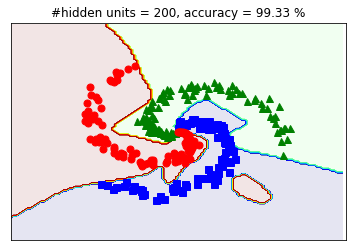

In [23]:
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
                  
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1 
#A1 = np.maximum(Z1, 0)
A1 = (np.exp(Z1) -np.exp(-Z1))/(np.exp(Z1)+np.exp(-Z1))
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)


# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
#plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])


plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%'%(d1, acc) )
#plt.axis('equal')
fn = 'ex_res'+ str(d1) + '.png'
plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show() 

In [14]:
from __future__ import division,print_function,unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

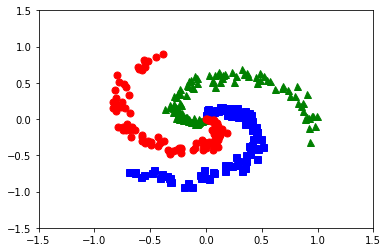

In [15]:
N = 100
d0 = 2
C = 3 
X = np.zeros((d0,N*C))
y = np.zeros((N*C, ))

for j in range(C):
    ix =range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    X[:,ix] = np.c_[r*np.sin(t),r*np.cos(t)].T
    y[ix] = j

plt.plot(X[0,:N],X[1,:N], 'bs', markersize = 7)
plt.plot(X[0,N:2*N],X[1,N:2*N],'g^',markersize = 7)
plt.plot(X[0,2*N:],X[1,2*N:],'ro', markersize = 7)

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show(-1.5,1.5)

In [16]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0 , keepdims = True ))
    Z = e_V /e_V.sum(axis = 0)
    return Z
from scipy import sparse
def convert_labels(y , C = 3):
    y = sparse.coo_matrix((np.ones_like(y),(y,np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]


In [17]:
d0 = 2
d1 = h = 200 # kích thước của các lớp ẩn (size of hidden layer)
d2 = C = 3
# khởi tạo các tham số ngẫu nhiên (initialize parameters randomely) 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

# X = X.T # mỗi cột của X là 1 điểm dữ liệu
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate 
for i in range(10000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # import pdb; pdb.set_trace()  # breakpoint 035ab9b5 //
    Yhat = softmax(Z2)
    
    # tính toán mất mát : average cross-entropy loss
    loss = cost(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %1000 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU 
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    W1 += -eta*dW1 
    b1 += -eta*db1 
    W2 += -eta*dW2
    b2 += -eta*db2 


iter 0, loss: 1.098294
iter 1000, loss: 0.113646
iter 2000, loss: 0.050816
iter 3000, loss: 0.036899
iter 4000, loss: 0.030654
iter 5000, loss: 0.027043
iter 6000, loss: 0.024663
iter 7000, loss: 0.022968
iter 8000, loss: 0.021675
iter 9000, loss: 0.020663


In [18]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1 , 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis = 0 )
acc = (100*np.mean(predicted_class == y))
print("training aaccuracy: %.2f%%" %acc)

training aaccuracy: 99.33%


(1, 14400)
100


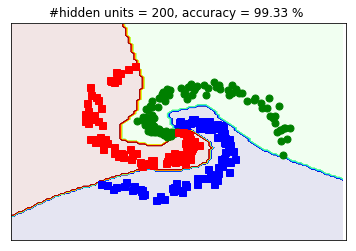

In [19]:
xm = np.arange(-1.5,1.5,0.025)
xlen = len(xm)
ym = np.arange(-1.5,1.5,0.025)
ylen = len(ym)
xx,yy = np.meshgrid(xm ,ym )

print(np.ones((1,xx.size)).shape)
xx1 = xx.ravel().reshape(1,xx.size) 
yy1 = yy.ravel().reshape(1,yy.size)
X0 = np.vstack((xx1,yy1))

Z1 = np.dot(W1.T,X0)+ b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T,A1) + b2
Z = np.argmax(Z2, axis = 0)

Z = Z.reshape(xx.shape)
Cs = plt.contourf(xx ,yy ,Z , 200, cmap = 'jet', alpha = .1)
N =100 
print(N)

plt.plot(X[0,:N],X[1,:N],'bs', markersize = 7)
plt.plot(X[0,N:2*N],X[1,N:2*N], 'go', markersize = 7)
plt.plot(X[0,2*N:],X[1,2*N:],'rs' , markersize = 7)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xticks(())
plt.yticks(())

plt.title("#hidden units = %d, accuracy = %.2f %% "%(d1, acc))
plt.show()